In [1]:
# 필요한 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hitter_2022 = pd.read_csv(".\hitter_2022.csv", encoding = "UTF-8", index_col = "RANK")
hitter_2023 = pd.read_csv(".\hitter_2023.csv", encoding = "UTF-8", index_col = "RANK")
hitter_2024 = pd.read_csv(".\hitter_2024.csv", encoding = "UTF-8", index_col = "RANK")
hitter_total = pd.read_csv(".\hitter_total.csv", encoding = "UTF-8", index_col = "RANK")

In [3]:
hitter_2022 = hitter_2022.drop("Unnamed: 0", axis = 1)
hitter_2023 = hitter_2023.drop("Unnamed: 0", axis = 1)
hitter_2024 = hitter_2024.drop("Unnamed: 0", axis = 1)
hitter_total = hitter_total.drop("Unnamed: 0", axis = 1)

In [4]:
hitter_2022.head()

,PLAYER,POSITION,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
RANK,,,,,,,,,,,,,,,,,,,
1,AaronJudge,CF,NYY,157,570,133,177,28,0,62,131,111,175,16,3,0.311,0.425,0.686,1.111
2,YordanAlvarez,DH,HOU,135,470,95,144,29,2,37,97,78,106,1,1,0.306,0.406,0.613,1.019
3,PaulGoldschmidt,1B,STL,151,561,106,178,41,0,35,115,79,141,7,0,0.317,0.404,0.578,0.982
4,JoseAltuve,2B,HOU,141,527,103,158,39,0,28,57,66,87,18,1,0.300,0.387,0.533,0.920
5,FreddieFreeman,1B,LAD,159,612,117,199,47,2,21,100,84,102,13,3,0.325,0.407,0.511,0.918


In [5]:
# hitter_total df의 컬럼 순서가 바뀌어 있어서 이름 재정의
hitter_total.columns = ["PLAYER", "POSITION", "YEAR", "TEAM", "G", "AB", "R", "H", "2B", "3B", "HR", "RBI", "BB", "SO", "SB", "CS", "AVG", "OBP", "SLG", "OPS"]
hitter_total.head()

,PLAYER,POSITION,YEAR,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
RANK,,,,,,,,,,,,,,,,,,,,
1,BarryBonds,LF,2004,SF,147,373,129,135,27,3,45,101,232,41,6,1,.362,.609,.812,1.421
2,BarryBonds,LF,2002,SF,143,403,117,149,31,2,46,110,198,47,9,2,.370,.582,.799,1.381
3,BabeRuth,RF,1920,NYY,142,458,158,172,36,9,54,137,150,80,14,14,.376,.532,.847,1.379
4,BarryBonds,LF,2001,SF,153,476,129,156,32,2,73,137,177,93,13,3,.328,.515,.863,1.378
5,BabeRuth,LF,1921,NYY,152,540,177,204,44,16,59,171,145,81,17,13,.378,.512,.846,1.358


In [6]:
# hitter_total df의 YEAR 컬럼은 사용하지 않을것 -> 2024년의 HR 데이터를 예측할 것이기 때문! -> 컬럼 제거
hitter_total = hitter_total.drop("YEAR", axis = 1)
hitter_total.head()

,PLAYER,POSITION,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
RANK,,,,,,,,,,,,,,,,,,,
1,BarryBonds,LF,SF,147,373,129,135,27,3,45,101,232,41,6,1,.362,.609,.812,1.421
2,BarryBonds,LF,SF,143,403,117,149,31,2,46,110,198,47,9,2,.370,.582,.799,1.381
3,BabeRuth,RF,NYY,142,458,158,172,36,9,54,137,150,80,14,14,.376,.532,.847,1.379
4,BarryBonds,LF,SF,153,476,129,156,32,2,73,137,177,93,13,3,.328,.515,.863,1.378
5,BabeRuth,LF,NYY,152,540,177,204,44,16,59,171,145,81,17,13,.378,.512,.846,1.358


In [7]:
# 왜 POSITION에 이상한 값이 있지...? -> \u200c
hitter_total["POSITION"].unique()

array(['LF', 'RF', '2B', '1B', 'X', '\u200c', 'CF', '3B', 'DH', 'SS', 'C'],
      dtype=object)

In [8]:
# \u200c 행은 날려주자
hitter_total = hitter_total.drop(hitter_total[hitter_total["POSITION"] == "\u200c"].index, axis = 0)
hitter_total

,PLAYER,POSITION,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
RANK,,,,,,,,,,,,,,,,,,,
1,BarryBonds,LF,SF,147,373,129,135,27,3,45,101,232,41,6,1,.362,.609,.812,1.421
2,BarryBonds,LF,SF,143,403,117,149,31,2,46,110,198,47,9,2,.370,.582,.799,1.381
3,BabeRuth,RF,NYY,142,458,158,172,36,9,54,137,150,80,14,14,.376,.532,.847,1.379
4,BarryBonds,LF,SF,153,476,129,156,32,2,73,137,177,93,13,3,.328,.515,.863,1.378
5,BabeRuth,LF,NYY,152,540,177,204,44,16,59,171,145,81,17,13,.378,.512,.846,1.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,GarrettAtkins,3B,COL,157,605,83,182,35,1,25,111,67,96,3,1,.301,.367,.486,.853
2985,JuanSoto,RF,SD,153,524,93,127,25,2,27,62,135,96,6,2,.242,.401,.452,.853
2985,GeeWalker,RF,CWS,120,442,69,135,23,6,16,87,38,32,9,4,.305,.360,.493,.853


In [9]:
# 다른 결측값 확인
hitter_total.isna().sum()

PLAYER        0
POSITION      0
TEAM          0
G             0
AB            0
R             0
H             0
2B            0
3B            0
HR            0
RBI           0
BB            0
SO          114
SB            0
CS            0
AVG           0
OBP           0
SLG           0
OPS           0
dtype: int64

In [10]:
# SO 컬럼에 결측치가 있다...? -> 찾아보니 STRIKE OUT이더라 아마 삼진아웃이 없지 않았을까?? -> 결측값을 0으로 채워주자 -> 다른컬럼에는 결측치가 없으니 전체적으로 채워주자
hitter_total.fillna(0, inplace = True)
hitter_total.isna().sum()


PLAYER      0
POSITION    0
TEAM        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
BB          0
SO          0
SB          0
CS          0
AVG         0
OBP         0
SLG         0
OPS         0
dtype: int64

In [11]:
# SB 컬럼도 한번 확인해보자
hitter_total["SB"].unique()

array(['6', '9', '14', '13', '17', '2', '7', '0', '11', '5', '10', '1',
       '3', '15', '48', '12', '33', '4', '21', '24', '29', '18', '46',
       '16', '8', '37', '27', '30', '83', '42', '39', '40', '25', '22',
       '20', '51', '41', '98', '28', '32', '23', '61', '35', '38', '52',
       '67', '19', '60', '31', '65', '43', '55', '73', '87', '103', '26',
       '49', '45', '64', '34', '54', '57', '50', '53', '97', '36', '75',
       '96', '70', '56', '44', '80', '63', '58', '47', '--', '78', '69',
       '84', '66', '111', '106', '82', '85', '59'], dtype=object)

In [12]:
#  값이 없는것에 "--" 표시를 해놓은듯...? -> 0으로 변경해보자 -> Stolen Base 라는 뜻이래요
hitter_total.loc[hitter_total["SB"] == "--", "SB"] = 0
hitter_total["SB"].unique()

array(['6', '9', '14', '13', '17', '2', '7', '0', '11', '5', '10', '1',
       '3', '15', '48', '12', '33', '4', '21', '24', '29', '18', '46',
       '16', '8', '37', '27', '30', '83', '42', '39', '40', '25', '22',
       '20', '51', '41', '98', '28', '32', '23', '61', '35', '38', '52',
       '67', '19', '60', '31', '65', '43', '55', '73', '87', '103', '26',
       '49', '45', '64', '34', '54', '57', '50', '53', '97', '36', '75',
       '96', '70', '56', '44', '80', '63', '58', '47', 0, '78', '69',
       '84', '66', '111', '106', '82', '85', '59'], dtype=object)

In [13]:
# CS 열에도 있네
hitter_total["CS"].unique()

array(['1', '2', '14', '3', '13', '21', '4', '0', '6', '9', '8', '10',
       '7', '12', '--', '5', '11', '17', '19', '15', '20', '38', '27',
       '16', '29', '22', '18', '23'], dtype=object)

In [14]:
#  값이 없는것에 "--" 표시를 해놓은듯...? -> 0으로 변경해보자
hitter_total.loc[hitter_total["CS"] == "--", "CS"] = 0
hitter_total["CS"].unique()

array(['1', '2', '14', '3', '13', '21', '4', '0', '6', '9', '8', '10',
       '7', '12', 0, '5', '11', '17', '19', '15', '20', '38', '27', '16',
       '29', '22', '18', '23'], dtype=object)

In [15]:
# 데이터 타입을 확인해보자
hitter_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2949 entries, 1 to 3000
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PLAYER    2949 non-null   object
 1   POSITION  2949 non-null   object
 2   TEAM      2949 non-null   object
 3   G         2949 non-null   object
 4   AB        2949 non-null   object
 5   R         2949 non-null   object
 6   H         2949 non-null   object
 7   2B        2949 non-null   object
 8   3B        2949 non-null   object
 9   HR        2949 non-null   object
 10  RBI       2949 non-null   object
 11  BB        2949 non-null   object
 12  SO        2949 non-null   object
 13  SB        2949 non-null   object
 14  CS        2949 non-null   object
 15  AVG       2949 non-null   object
 16  OBP       2949 non-null   object
 17  SLG       2949 non-null   object
 18  OPS       2949 non-null   object
dtypes: object(19)
memory usage: 525.3+ KB


In [16]:
# PLAYER에 왜 0이 들어가있을까...?
hitter_total["PLAYER"].value_counts()

PLAYER
HankAaron       17
StanMusial      17
MelOtt          16
WillieMays      16
FrankThomas     15
                ..
TipO'Neill       1
J.T.Snow         1
NickMarkakis     1
BobbyWallace     1
CraigWilson      1
Name: count, Length: 956, dtype: int64

In [17]:
# 전부다 object 타입...? preprocessing이 필요할듯 싶다
# 먼저 누가봐도 String 타입인 친구들 - "POSITION", "TEAM" 부터 변환을 해주자
from sklearn.preprocessing import LabelEncoder

col_list = ["POSITION", "TEAM"]
temp = pd.DataFrame()
for i in col_list :
    label_encoder = LabelEncoder()
    label_encoder.fit(hitter_total[i])
    hitter_2023[i] = label_encoder.transform(hitter_2023[i])
    hitter_2022[i] = label_encoder.transform(hitter_2022[i])
    hitter_2024[i] = label_encoder.transform(hitter_2024[i])
    hitter_total[i] = label_encoder.transform(hitter_total[i])
hitter_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2949 entries, 1 to 3000
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   PLAYER    2949 non-null   object
 1   POSITION  2949 non-null   int32 
 2   TEAM      2949 non-null   int32 
 3   G         2949 non-null   object
 4   AB        2949 non-null   object
 5   R         2949 non-null   object
 6   H         2949 non-null   object
 7   2B        2949 non-null   object
 8   3B        2949 non-null   object
 9   HR        2949 non-null   object
 10  RBI       2949 non-null   object
 11  BB        2949 non-null   object
 12  SO        2949 non-null   object
 13  SB        2949 non-null   object
 14  CS        2949 non-null   object
 15  AVG       2949 non-null   object
 16  OBP       2949 non-null   object
 17  SLG       2949 non-null   object
 18  OPS       2949 non-null   object
dtypes: int32(2), object(17)
memory usage: 502.3+ KB


In [18]:
# 예쁘게 정수형으로 변환이 되었으니 밑에 숫자인척하는 object들을 변환해주자 뒤에 AVG, OBP, SLG, OPS은 실수형, 이거 빼고는 정수형으로 변환해주면 될것같다
# 정수형으로 변환을 먼저 해보자
col_list = ["G", "AB", "R", "H", "2B", "3B", "HR", "RBI", "BB", "SO", "SB", "CS"]

for i in col_list :
    hitter_total[i] = hitter_total[i].astype("int64")
    print(i,"컬럼을 정수형으로 변환")
hitter_total.dtypes

G 컬럼을 정수형으로 변환
AB 컬럼을 정수형으로 변환
R 컬럼을 정수형으로 변환
H 컬럼을 정수형으로 변환
2B 컬럼을 정수형으로 변환
3B 컬럼을 정수형으로 변환
HR 컬럼을 정수형으로 변환
RBI 컬럼을 정수형으로 변환
BB 컬럼을 정수형으로 변환
SO 컬럼을 정수형으로 변환
SB 컬럼을 정수형으로 변환
CS 컬럼을 정수형으로 변환


PLAYER      object
POSITION     int32
TEAM         int32
G            int64
AB           int64
R            int64
H            int64
2B           int64
3B           int64
HR           int64
RBI          int64
BB           int64
SO           int64
SB           int64
CS           int64
AVG         object
OBP         object
SLG         object
OPS         object
dtype: object

In [19]:
# 이제 AVG, OBP, SLG, OPS를 실수형을 바꾸려고 하는데 .000 형태로 되어있어 바로 바뀌지는 않을듯...? -> 이게 되네
col_list = ["AVG", "OBP", "SLG", "OPS"]

for i in col_list :
    hitter_total[i] = hitter_total[i].astype("float")
    print(i,"컬럼을 실수형으로 변환")
hitter_total.dtypes

AVG 컬럼을 실수형으로 변환
OBP 컬럼을 실수형으로 변환
SLG 컬럼을 실수형으로 변환
OPS 컬럼을 실수형으로 변환


PLAYER       object
POSITION      int32
TEAM          int32
G             int64
AB            int64
R             int64
H             int64
2B            int64
3B            int64
HR            int64
RBI           int64
BB            int64
SO            int64
SB            int64
CS            int64
AVG         float64
OBP         float64
SLG         float64
OPS         float64
dtype: object

In [20]:
# 데이터프레임이 어떻게 바뀌었는지 봐보자 => 아름답게 바뀌었다
hitter_total.head()

,PLAYER,POSITION,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
RANK,,,,,,,,,,,,,,,,,,,
1,BarryBonds,6,47,147,373,129,135,27,3,45,101,232,41,6,1,0.362,0.609,0.812,1.421
2,BarryBonds,6,47,143,403,117,149,31,2,46,110,198,47,9,2,0.370,0.582,0.799,1.381
3,BabeRuth,7,37,142,458,158,172,36,9,54,137,150,80,14,14,0.376,0.532,0.847,1.379
4,BarryBonds,6,47,153,476,129,156,32,2,73,137,177,93,13,3,0.328,0.515,0.863,1.378
5,BabeRuth,6,37,152,540,177,204,44,16,59,171,145,81,17,13,0.378,0.512,0.846,1.358


평균 : 25.339437097321127 중앙값 : 26.0


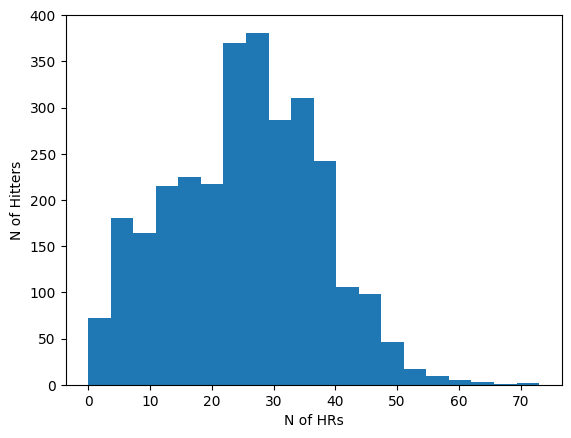

In [21]:
# 홈런의 분포를 확인해보자 -> 히스토그램
print("평균 :", hitter_total["HR"].mean(), "중앙값 :", hitter_total["HR"].median())
plt.hist(hitter_total["HR"], bins = 20)
plt.xlabel("N of HRs")
plt.ylabel("N of Hitters")
plt.show()

<Axes: >

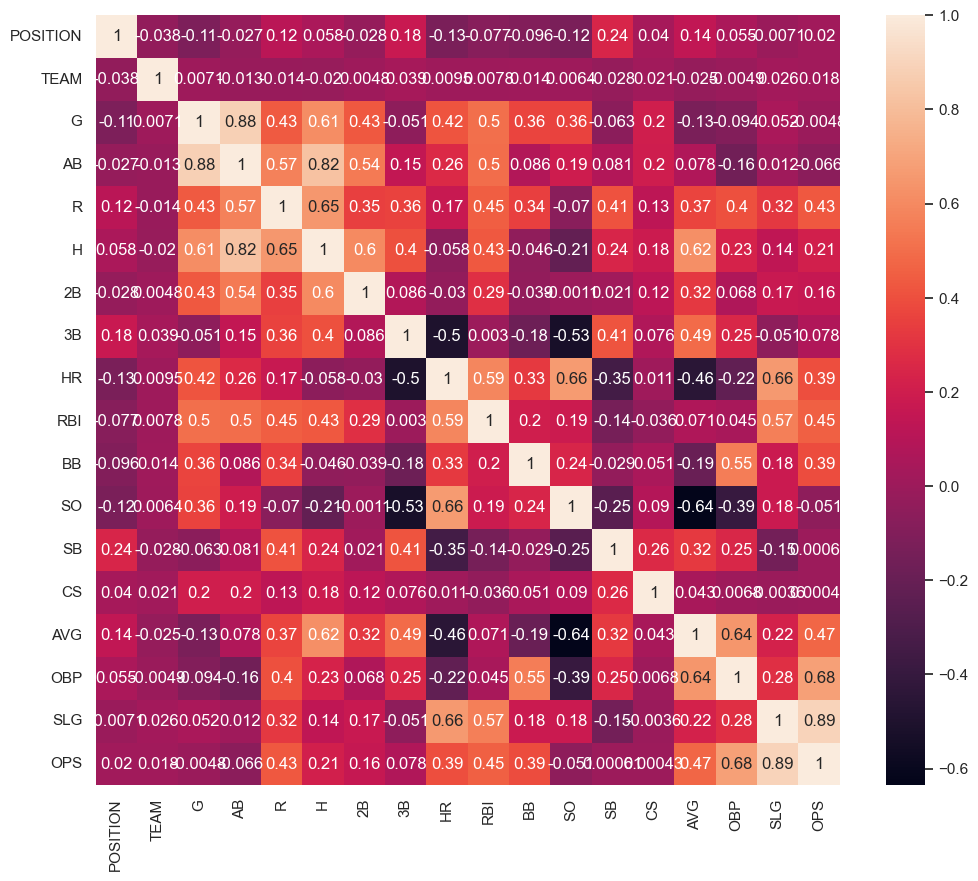

In [22]:
# 이제 아름다운 heatmap을 이용해 상관관계를 알아보도록 하자
hitter_total = hitter_total.drop("PLAYER", axis = 1)
sns.set(rc={"figure.figsize" : (12,10)})
sns.heatmap(hitter_total.corr(), annot=True)

In [23]:
# 뭔지 모르겠지만 SO랑 제일 높고 3B랑 제일 낮다
hitter_total.corr()["HR"].sort_values(ascending=False)

HR          1.000000
SO          0.662607
SLG         0.656308
RBI         0.585589
G           0.417935
OPS         0.393772
BB          0.326475
AB          0.260235
R           0.165662
CS          0.010501
TEAM        0.009535
2B         -0.029776
H          -0.058369
POSITION   -0.126769
OBP        -0.224746
SB         -0.347615
AVG        -0.455101
3B         -0.501608
Name: HR, dtype: float64

In [24]:
# 각 feature별로 colinearity를 한번 확인해보자 => 다들 상관계수가 높아 아마 다중공선성이 확인될듯...?
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = pd.DataFrame()
VIF["VIF Factor"] = [variance_inflation_factor(hitter_total.values, i) for i in range(hitter_total.shape[1])]
VIF["features"] = hitter_total.columns
VIF

C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,3.118367,POSITION
1,3.872568,TEAM
2,812.350657,G
3,1107.757278,AB
4,104.686113,R
5,1143.281183,H
6,70.268097,2B
7,14.682910,3B
8,322.490309,HR
9,52.467430,RBI


In [25]:
# VIF가 10 이상인것 즉 다중공선성이 확인되는 컬럼들만 따로 하나씩 확인해보자 G, AB, R, H, 2B, 3B, HR, RBI, BB, SO, SB, CS, AVG, OBP, SLG, OPS
# 이중에서 상관계수의 값이 0.5이상일시에 다중공선성이 있는 컬럼으로 최종 판단하여 교차항을 생성하자
col_names = ["G", "AB", "R", "H", "2B", "3B", "RBI", "BB", "SO", "SB", "CS", "AVG", "OBP", "SLG", "OPS"]
temp_no = 0
temp_hitter_total = pd.DataFrame()
for j in col_names :
    temp = hitter_total.corr()[j] > 0.5
    n = 0
    for i in temp.index :
        if i != "HR" :
            if (temp.iloc[n] == True) and (j != i) :
                if j+"*"+i in temp_hitter_total.columns :
                    print(j," * ",i,"가 이미 있어서 스킵")
                elif i+"*"+j in temp_hitter_total.columns :
                    print(j," * ",i,"가 이미 있어서 스킵")
                else:
                    print(j, "*", i)
                    temp_no += 1
                    temp_hitter_total[j+"*"+i] = hitter_total[j] * hitter_total[i]
            n += 1
print("교차항 :", temp_no,"개 필요함")

G * AB
G * H
G * BB
AB  *  G 가 이미 있어서 스킵
AB * R
AB * H
AB * 2B
AB * BB
R  *  AB 가 이미 있어서 스킵
R * H
H  *  G 가 이미 있어서 스킵
H  *  AB 가 이미 있어서 스킵
H  *  R 가 이미 있어서 스킵
H * 2B
H * OBP
2B  *  AB 가 이미 있어서 스킵
2B  *  H 가 이미 있어서 스킵
RBI * G
RBI * AB
RBI * BB
RBI * OPS
BB * SO
BB * SLG
SO * RBI
SO * SB
SB * CS
CS * AVG
AVG * H
AVG * OBP
AVG * SLG
OBP * SO
OBP * SLG
SLG * RBI
SLG  *  BB 가 이미 있어서 스킵
SLG * OPS
OPS  *  SLG 가 이미 있어서 스킵
교차항 : 27 개 필요함


In [26]:
# 교차항 생성 결과를 확인해보자~
temp_hitter_total = pd.concat([hitter_total, temp_hitter_total], axis = 1)
temp_hitter_total.columns

Index(['POSITION', 'TEAM', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB',
       'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS', 'G*AB', 'G*H', 'G*BB',
       'AB*R', 'AB*H', 'AB*2B', 'AB*BB', 'R*H', 'H*2B', 'H*OBP', 'RBI*G',
       'RBI*AB', 'RBI*BB', 'RBI*OPS', 'BB*SO', 'BB*SLG', 'SO*RBI', 'SO*SB',
       'SB*CS', 'CS*AVG', 'AVG*H', 'AVG*OBP', 'AVG*SLG', 'OBP*SO', 'OBP*SLG',
       'SLG*RBI', 'SLG*OPS'],
      dtype='object')

In [27]:
# 다시한번 상관게수를 확인해보자
temp_corr = temp_hitter_total.corr()["HR"]
temp_corr = abs(temp_corr) > 0.5
(abs(temp_corr) > 0.5).value_counts()

HR
False    31
True     14
Name: count, dtype: int64

In [28]:
# 상관계수 절댓값이 0.5가 넘은 최후의 합격자들 14개 특성
temp_corr = temp_corr.drop(temp_corr[temp_corr == False].index, axis = 0)
temp_corr

3B         True
HR         True
RBI        True
SO         True
SLG        True
RBI*G      True
RBI*AB     True
RBI*BB     True
RBI*OPS    True
BB*SO      True
SO*RBI     True
OBP*SO     True
SLG*RBI    True
SLG*OPS    True
Name: HR, dtype: bool

In [29]:
# 최후의 합격자들로만 데이터프레임 구성
result_df = pd.DataFrame()
col_names_1 = ["3B", "HR", "RBI", "SO", "SLG"]
col_names_2 = ["RBI*G", "RBI*AB", "RBI*BB", "RBI*OPS", "BB*SO", "SO*RBI", "OBP*SO", "SLG*RBI", "SLG*OPS"]

for i in col_names_1 :
    result_df = pd.concat([result_df,hitter_total[i]], axis = 1)
for j in col_names_2 :
    result_df = pd.concat([result_df,temp_hitter_total[j]], axis = 1)
result_df

,3B,HR,RBI,SO,SLG,RBI*G,RBI*AB,RBI*BB,RBI*OPS,BB*SO,SO*RBI,OBP*SO,SLG*RBI,SLG*OPS
1,3,45,101,41,0.812,14847,37673,23432,143.521,9512,4141,24.969,82.012,1.153852
2,2,46,110,47,0.799,15730,44330,21780,151.910,9306,5170,27.354,87.890,1.103419
3,9,54,137,80,0.847,19454,62746,20550,188.923,12000,10960,42.560,116.039,1.168013
4,2,73,137,93,0.863,20961,65212,24249,188.786,16461,12741,47.895,118.231,1.189214
5,16,59,171,81,0.846,25992,92340,24795,232.218,11745,13851,41.472,144.666,1.148868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,1,25,111,96,0.486,17427,67155,7437,94.683,6432,10656,35.232,53.946,0.414558
2985,2,27,62,96,0.452,9486,32488,8370,52.886,12960,5952,38.496,28.024,0.385556
2985,6,16,87,32,0.493,10440,38454,3306,74.211,1216,2784,11.520,42.891,0.420529
2985,1,27,106,57,0.487,16854,63176,6784,90.418,3648,6042,20.862,51.622,0.415411


<Axes: >

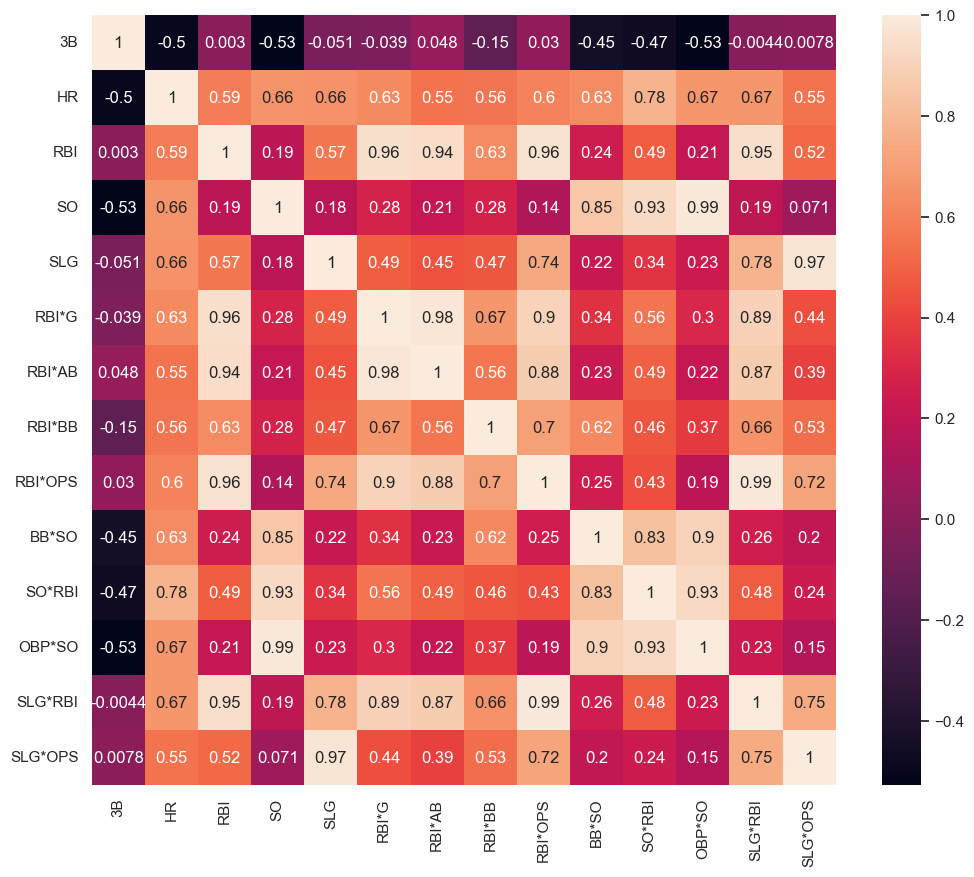

In [30]:
# 다시 그려보는 아름다운 상관계수 히트맵
sns.heatmap(result_df.corr(), annot = True)

(array([ 37.,  67., 148., 115., 158., 106., 172., 120., 150., 272., 186.,
        293., 178., 277., 141., 125., 163.,  60.,  74.,  39.,  31.,   9.,
          8.,   9.,   3.,   3.,   2.,   1.,   1.,   1.]),
 array([ 0.        ,  2.43333333,  4.86666667,  7.3       ,  9.73333333,
        12.16666667, 14.6       , 17.03333333, 19.46666667, 21.9       ,
        24.33333333, 26.76666667, 29.2       , 31.63333333, 34.06666667,
        36.5       , 38.93333333, 41.36666667, 43.8       , 46.23333333,
        48.66666667, 51.1       , 53.53333333, 55.96666667, 58.4       ,
        60.83333333, 63.26666667, 65.7       , 68.13333333, 70.56666667,
        73.        ]),
 <BarContainer object of 30 artists>)

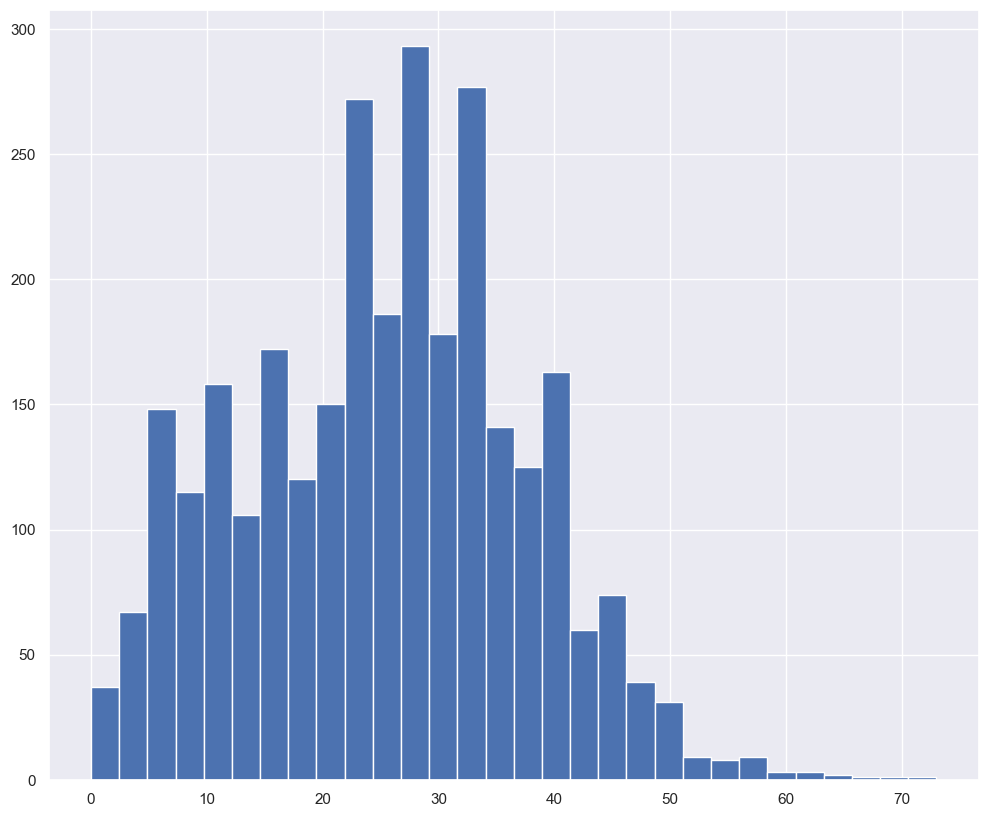

In [31]:
# 그럼 이제 홈런의 분포를 확인해볼까?
plt.hist(result_df["HR"], bins = 30)

In [32]:
# 최종 데이터의 왜곡 정도를 확인 및 왜곡 정도가 높은 친구들을 로그 스케일로 변환
from scipy.stats import skew

features_index = result_df.dtypes[result_df.dtypes != "object"].index

skew_features = result_df[features_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

SLG*OPS    2.024232
3B         1.296832
RBI*BB     1.179365
SLG        1.170047
dtype: float64


In [33]:
# 4개 친구들이 왜도가 높다 => 로그 스케일로 변환
result_df[skew_features_top.index] = np.log1p(result_df[skew_features_top.index])

# 다시 데이터의 왜곡 정도를 확인

features_index = result_df.dtypes[result_df.dtypes != "object"].index

skew_features = result_df[features_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

SLG*OPS    1.662842
SLG        1.008662
dtype: float64


In [34]:
X = result_df.drop(["HR"], axis = 1)
y = result_df["HR"]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
# 검증셋 크기는 0.3 정도로
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 1004)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

# Robust 스케일러 활용 스케일링 진행
rb_scaler = RobustScaler()
X_train_rb = rb_scaler.fit_transform(X_train)
X_valid_rb = rb_scaler.transform(X_valid)
X_train_rb = pd.DataFrame(X_train_rb, index = X_train.index, columns = X_train.columns)
X_train_rb
rb_scaler_y = RobustScaler()
#y_train = y_train.values.reshape(-1, 1)
#y_valid = y_valid.values.reshape(-1, 1)
#y_train = rb_scaler_y.fit_transform(y_train)
#y_valid = rb_scaler_y.transform(y_valid)
print(y_train.shape)
print(y_valid.shape)

(2064, 13) (2064,)
(885, 13) (885,)
(2064,)
(885,)


In [36]:
# 일단 한번 학습을 시켜보자
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
import math

result_matrix = pd.DataFrame()
# 선형회귀
lg_model = LinearRegression()
lg_model.fit(X_train, y_train)
lg_result = {"Model" : "LinearRegression"}
lg_result["Train score"] = lg_model.score(X_train, y_train)
lg_result["Test score"] = lg_model.score(X_valid, y_valid)
lg_result["Train RMSE"] = math.sqrt(mean_squared_error(lg_model.predict(X_train), y_train))
lg_result["Test RMSE"] = math.sqrt(mean_squared_error(lg_model.predict(X_valid), y_valid))
lg_result = pd.DataFrame(lg_result, index = ["Model"])
result_matrix = pd.concat([result_matrix,lg_result], axis = 0)

# 릿지회귀
ridge_model = Ridge(alpha = 0.1, solver="sag", random_state = 1004)
ridge_model.fit(X_train, y_train)
ridge_result = {}
ridge_result["Model"] = "Ridge"
ridge_result["Train score"] = ridge_model.score(X_train, y_train)
ridge_result["Test score"] = ridge_model.score(X_valid, y_valid)
ridge_result["Train RMSE"] = math.sqrt(mean_squared_error(ridge_model.predict(X_train), y_train))
ridge_result["Test RMSE"] = math.sqrt(mean_squared_error(ridge_model.predict(X_valid), y_valid))
ridge_result = pd.DataFrame(ridge_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, ridge_result], axis = 0)

# 라쏘회귀
lasso_model = Lasso(alpha = 0.1, random_state = 1004)
lasso_model.fit(X_train, y_train)
lasso_result = {}
lasso_result["Model"] = "Lasso"
lasso_result["Train score"] = lasso_model.score(X_train, y_train)
lasso_result["Test score"] = lasso_model.score(X_valid, y_valid)
lasso_result["Train RMSE"] = math.sqrt(mean_squared_error(lasso_model.predict(X_train), y_train))
lasso_result["Test RMSE"] = math.sqrt(mean_squared_error(lasso_model.predict(X_valid), y_valid))
lasso_result = pd.DataFrame(lasso_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, lasso_result], axis = 0)

# 엘라스틱넷
elastic_model = ElasticNet(alpha = 0.1, l1_ratio=0.5, random_state = 1004)
elastic_model.fit(X_train, y_train)
elastic_result = {}
elastic_result["Model"] = "ElasticNet"
elastic_result["Train score"] = elastic_model.score(X_train, y_train)
elastic_result["Test score"] = elastic_model.score(X_valid, y_valid)
elastic_result["Train RMSE"] = math.sqrt(mean_squared_error(elastic_model.predict(X_train), y_train))
elastic_result["Test RMSE"] = math.sqrt(mean_squared_error(elastic_model.predict(X_valid), y_valid))
elastic_result = pd.DataFrame(elastic_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, elastic_result], axis = 0)

# xgboost
xg_model = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, random_state = 1004)
xg_model.fit(X_train, y_train)
xg_result = {}
xg_result["Model"] = "XGBoostRegressor"
xg_result["Train score"] = xg_model.score(X_train, y_train)
xg_result["Test score"] = xg_model.score(X_valid, y_valid)
xg_result["Train RMSE"] = math.sqrt(mean_squared_error(xg_model.predict(X_train), y_train))
xg_result["Test RMSE"] = math.sqrt(mean_squared_error(xg_model.predict(X_valid), y_valid))
xg_result = pd.DataFrame(xg_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, xg_result], axis = 0)

# 랜덤포레스트 회귀
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state = 1004)
rf_model.fit(X_train, y_train)
rf_result = {}
rf_result["Model"] = "RandomForestRegressor"
rf_result["Train score"] = rf_model.score(X_train, y_train)
rf_result["Test score"] = rf_model.score(X_valid, y_valid)
rf_result["Train RMSE"] = math.sqrt(mean_squared_error(rf_model.predict(X_train), y_train))
rf_result["Test RMSE"] = math.sqrt(mean_squared_error(rf_model.predict(X_valid), y_valid))
rf_result = pd.DataFrame(rf_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, rf_result], axis = 0)

result_matrix

C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e+04, tolerance: 3.035e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

,Model,Train score,Test score,Train RMSE,Test RMSE
Model,LinearRegression,0.938178,0.933361,3.014895,3.035104
Model,Ridge,0.695585,0.664104,6.690129,6.814126
Model,Lasso,0.928478,0.924872,3.242802,3.222620
Model,ElasticNet,0.922472,0.918365,3.376227,3.359284
Model,XGBoostRegressor,0.989606,0.880743,1.236211,4.060226
Model,RandomForestRegressor,0.916120,0.832425,3.511813,4.812960


# 파라미터에 민감한 친구들이 있으니 GridCV를 실시하고 한번 다시 봐보도록 하자
# 라쏘회귀
lasso_model = Lasso(random_state = 1004)
lasso_params = {
    "alpha" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}
lasso_grid = GridSearchCV(lasso_model, param_grid = lasso_params, cv = 3, refit = True)
lasso_grid.fit(X_train_rb, y_train)

print("라쏘 최적 파라미터 :", lasso_grid.best_params_)
print("라쏘 최적 스코어 :", lasso_grid.best_score_)

# 릿지회귀
ridge_model = Ridge(random_state = 1004)
ridge_params = {
    "alpha" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "solver" : ["sag", "cholesky"],
}
ridge_grid = GridSearchCV(ridge_model, param_grid = ridge_params, cv = 3, refit = True)
ridge_grid.fit(X_train_rb, y_train)

print("릿지 최적 파라미터 :", ridge_grid.best_params_)
print("릿지 최적 스코어 :", ridge_grid.best_score_)

# xgboost
xg_model = XGBRegressor(random_state = 1004)
xg_params = {
    "n_estimators" : [100, 200],
    "learning_rate" : [0.05, 0.1, 0.15],
    "gamma" : [0, 0.01],
    "subsample" : [0.15, 0.25, 0.35],
    "colsample_bytree" : [1, 2, 3],
    "max_depth" : [3, 4, 5, 6, 7]
}
xg_grid = GridSearchCV(xg_model, param_grid = xg_params, cv = 3, refit = True)
xg_grid.fit(X_train_rb, y_train)

print("XG 최적 파라미터 :", xg_grid.best_params_)
print("XG 최적 스코어 :", xg_grid.best_score_)

# rfRegressor
RF_model = RandomForestRegressor(random_state = 1004)
RF_params = {
    "n_estimators" : [100, 200, 300, 400, 500],
    "max_depth" : [3, 4, 5, 6, 7]
}
RF_grid = GridSearchCV(RF_model, param_grid = RF_params, cv = 3, refit = True)
RF_grid.fit(X_train_rb, y_train)

print("RF 최적 파라미터 :", RF_grid.best_params_)
print("RF 최적 스코어 :", RF_grid.best_score_)

In [37]:
# 엘라스틱넷
elastic_model = ElasticNet(random_state = 1004)
elastic_params = {
    "alpha" : [0.1, 0.2, 0.3, 0.4, 0.5],
    "l1_ratio" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ,1]
}
elastic_grid = GridSearchCV(elastic_model, param_grid = elastic_params, cv = 3, refit = True)
elastic_grid.fit(X_train_rb, y_train)

print("elastic 최적 파라미터 :", elastic_grid.best_params_)
print("elastic 최적 스코어 :", elastic_grid.best_score_)

elastic 최적 파라미터 : {'alpha': 0.1, 'l1_ratio': 1}
elastic 최적 스코어 : 0.8820818552538526


In [38]:
# 일단 한번 학습을 시켜보자
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
import math
pd.options.display.float_format = '{:.4f}'.format

result_matrix = pd.DataFrame()
# 선형회귀
lg_model = LinearRegression()
lg_model.fit(X_train_rb, y_train)
lg_result = {"Model" : "LinearRegression"}
lg_result["Train score"] = lg_model.score(X_train, y_train)
lg_result["Test score"] = lg_model.score(X_valid, y_valid)
lg_result["Train RMSE"] = math.sqrt(mean_squared_error(lg_model.predict(X_train), y_train))
lg_result["Test RMSE"] = math.sqrt(mean_squared_error(lg_model.predict(X_valid), y_valid))
lg_result = pd.DataFrame(lg_result, index = ["Model"])
result_matrix = pd.concat([result_matrix,lg_result], axis = 0)

# 릿지회귀
ridge_model = Ridge(alpha = 0.1, solver="sag", random_state = 1004)
ridge_model.fit(X_train, y_train)
ridge_result = {}
ridge_result["Model"] = "Ridge"
ridge_result["Train score"] = ridge_model.score(X_train, y_train)
ridge_result["Test score"] = ridge_model.score(X_valid, y_valid)
ridge_result["Train RMSE"] = math.sqrt(mean_squared_error(ridge_model.predict(X_train), y_train))
ridge_result["Test RMSE"] = math.sqrt(mean_squared_error(ridge_model.predict(X_valid), y_valid))
ridge_result = pd.DataFrame(ridge_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, ridge_result], axis = 0)

# 라쏘회귀
lasso_model = Lasso(alpha = 0.1, random_state = 1004)
lasso_model.fit(X_train, y_train)
lasso_result = {}
lasso_result["Model"] = "Lasso"
lasso_result["Train score"] = lasso_model.score(X_train, y_train)
lasso_result["Test score"] = lasso_model.score(X_valid, y_valid)
lasso_result["Train RMSE"] = math.sqrt(mean_squared_error(lasso_model.predict(X_train), y_train))
lasso_result["Test RMSE"] = math.sqrt(mean_squared_error(lasso_model.predict(X_valid), y_valid))
lasso_result = pd.DataFrame(lasso_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, lasso_result], axis = 0)

# 엘라스틱넷
elastic_model = ElasticNet(alpha = 0.1, l1_ratio=0.5, random_state = 1004)
elastic_model.fit(X_train, y_train)
elastic_result = {}
elastic_result["Model"] = "ElasticNet"
elastic_result["Train score"] = elastic_model.score(X_train, y_train)
elastic_result["Test score"] = elastic_model.score(X_valid, y_valid)
elastic_result["Train RMSE"] = math.sqrt(mean_squared_error(elastic_model.predict(X_train), y_train))
elastic_result["Test RMSE"] = math.sqrt(mean_squared_error(elastic_model.predict(X_valid), y_valid))
elastic_result = pd.DataFrame(elastic_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, elastic_result], axis = 0)

# xgboost
xg_model = XGBRegressor(n_estimators=200, learning_rate=0.15, gamma=0, subsample=0.35,
                           colsample_bytree=1, max_depth=3, random_state = 1004)
xg_model.fit(X_train, y_train)
xg_result = {}
xg_result["Model"] = "XGBoostRegressor"
xg_result["Train score"] = xg_model.score(X_train, y_train)
xg_result["Test score"] = xg_model.score(X_valid, y_valid)
xg_result["Train RMSE"] = math.sqrt(mean_squared_error(xg_model.predict(X_train), y_train))
xg_result["Test RMSE"] = math.sqrt(mean_squared_error(xg_model.predict(X_valid), y_valid))
xg_result = pd.DataFrame(xg_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, xg_result], axis = 0)

# 랜덤포레스트 회귀
rf_model = RandomForestRegressor(n_estimators=100, max_depth=7, random_state = 1004)
rf_model.fit(X_train, y_train)
rf_result = {}
rf_result["Model"] = "RandomForestRegressor"
rf_result["Train score"] = rf_model.score(X_train, y_train)
rf_result["Test score"] = rf_model.score(X_valid, y_valid)
rf_result["Train RMSE"] = math.sqrt(mean_squared_error(rf_model.predict(X_train), y_train))
rf_result["Test RMSE"] = math.sqrt(mean_squared_error(rf_model.predict(X_valid), y_valid))
rf_result = pd.DataFrame(rf_result, index = ["Model"])
result_matrix = pd.concat([result_matrix, rf_result], axis = 0)

result_matrix

C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e+04, tolerance: 3.035e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of i

,Model,Train score,Test score,Train RMSE,Test RMSE
Model,LinearRegression,-32838628.4942,-34398681.1077,69485.4513,68957.0642
Model,Ridge,0.6956,0.6641,6.6901,6.8141
Model,Lasso,0.9285,0.9249,3.2428,3.2226
Model,ElasticNet,0.9225,0.9184,3.3762,3.3593
Model,XGBoostRegressor,0.9618,0.9025,2.3702,3.6716
Model,RandomForestRegressor,0.9161,0.8324,3.5118,4.8130


In [39]:
# Lasso or ElasticNet이 Good Model
# 그럼 이제 예측에 사용할 데이터를 만들어보자~
'''
문제 1 : 2024년 타자 데이터가 온전하지 않다
따라서, prediction 을 위한 input가 온전하지 않다.
현재 구할 수 있는 2024년 데이터는 봄 훈련시 데이터 뿐 => 이를 input 데이터로 활용하기에는 좀 불완전하다.
차선 해결책 1 : 타자 리스트는 2023년 타자 명단을 활용한다. + 2024년 데이터도 같이
차선 해결책 2 : 예측값으로 활용할 feature values가 필요하다
'''
target_hitter = pd.concat([hitter_2023["PLAYER"], hitter_2024["PLAYER"]], axis = 0)
target_hitter = target_hitter.unique()
target_hitter

array(['ShoheiOhtani', 'CoreySeager', 'RonaldAcuña', 'MattOlson',
       'MookieBetts', 'FreddieFreeman', 'YandyDíaz', 'JuanSoto',
       'MarcellOzuna', 'BryceHarper', 'KyleTucker', 'CodyBellinger',
       'CorbinCarroll', 'LuisArraez', 'AustinRiley', 'TristonCasas',
       'LuisRobert', 'JorgeSoler', 'RafaelDevers', 'OzzieAlbies',
       'KetelMarte', 'SeiyaSuzuki', 'IsaacParedes', 'AdolisGarcía',
       'JoséRamírez', 'ChristianWalker', 'BrandonNimmo', 'JakeBurger',
       'MarcusSemien', 'WilliamContreras', 'PeteAlonso', 'SpencerSteer',
       'TJFriedl', 'J.P.Crawford', 'JulioRodríguez', 'BrentRooker',
       'KyleSchwarber', 'ChristianYelich', 'BoBichette',
       'GunnarHenderson', 'BobbyWitt', 'PaulGoldschmidt',
       'AdleyRutschman', 'MichaelHarris', 'MaxMuncy', 'JeimerCandelario',
       'FranciscoLindor', 'AlexBregman', 'BrandonDrury', 'GleyberTorres',
       'JustinTurner', 'AnthonySantander', 'WillSmith', 'JackSuwinski',
       'IanHapp', 'XanderBogaerts', 'JamesOutman',

In [40]:
import warnings
warnings.filterwarnings("ignore")
# 방법 1 : hitter_total의 평균값을 이용해서 hitter_2023에 넣어서 활용 => 뭔가가 뭔가 문제가 있어서 57개밖에 안가져와진다...
# 방법 2 : 2018년부터 2024년까지의 평균 데이터를 이용해 2024년 예측 Input으로 활용해보자
# 2018년부터 2023년까지 싹다 불러옴
hitter_2018 = pd.read_csv(".\hitter_2018.csv", encoding = "UTF-8", index_col = "RANK")
hitter_2019 = pd.read_csv(".\hitter_2019.csv", encoding = "UTF-8", index_col = "RANK")
hitter_2020 = pd.read_csv(".\hitter_2020.csv", encoding = "UTF-8", index_col = "RANK")
hitter_2021 = pd.read_csv(".\hitter_2021.csv", encoding = "UTF-8", index_col = "RANK")
hitter_2022 = pd.read_csv(".\hitter_2022.csv", encoding = "UTF-8", index_col = "RANK")
hitter_2023 = pd.read_csv(".\hitter_2023.csv", encoding = "UTF-8", index_col = "RANK")
# hitter_2024 = pd.read_csv(".\hitter_2024.csv", encoding = "UTF-8", index_col = "RANK") -> 24년은 데이터 수가 너무적어 패스

# 위에서 했던 전처리 친구들을 빠르게 진행
df_list = ["hitter_2018", "hitter_2019", "hitter_2020", "hitter_2021", "hitter_2022", "hitter_2023"] # 반복할 리스트 정의
for i in df_list:
    if i[0:6] == "hitter" and i[-1] != "l" : # total 친구는 빼고 진행할거라 변수를 반복하도록 해줌
        if "Unnamed: 0" in globals()[i].columns :
            globals()[i] = globals()[i].drop("Unnamed: 0", axis = 1)
        globals()[i].columns = ["PLAYER", "POSITION", "TEAM", "G", "AB", "R", "H", "2B", "3B", "HR", "RBI", "BB", "SO", "SB", "CS", "AVG", "OBP", "SLG", "OPS"]
        col_list = ["G", "AB", "R", "H", "2B", "3B", "HR", "RBI", "BB", "SO", "SB", "CS"]

        globals()[i] = globals()[i].drop(["POSITION", "TEAM"], axis = 1) # 얘넨 어차피 안쓸거라 제외

        globals()[i].fillna(0, inplace = True)

        globals()[i].loc[globals()[i]["CS"] == "--", "CS"] = 0 
        globals()[i].loc[globals()[i]["SB"] == "--", "SB"] = 0
        # 변수 정수형으로 변경
        for j in col_list :
            globals()[i][j] = globals()[i][j].astype("int64")

        # 변수 실수형으로 변경
        col_list = ["AVG", "OBP", "SLG", "OPS"]
        for j in col_list :
            globals()[i][j] = globals()[i][j].astype("float")
        
        # 교차항 생성
        col_names = ["G", "AB", "R", "H", "2B", "3B", "RBI", "BB", "SO", "SB", "CS", "AVG", "OBP", "SLG", "OPS"]
        temp_hitter_df = pd.DataFrame()
        for j in col_names :
            # temp = globals()[i].drop("PLAYER", axis = 1)
            # temp = temp.corr()[j] > 0.5
            n = 0
            for x in col_names :
                if x != "HR" :
                    if (j != x) :
                        if j+"*"+x in temp_hitter_df.columns :
                            # print(j,"*",x, "가 있어서 스킵")
                            continue
                        elif x+"*"+j in temp_hitter_df.columns :
                            # print(x,"*",j,"가 있어서 스킵")
                            continue
                        else:
                            temp_hitter_df[x+"*"+j] = globals()[i][j] * globals()[i][x]
                            temp_hitter_df[j+"*"+x] = globals()[i][j] * globals()[i][x]
                    n += 1
        # print(temp_hitter_df.columns)
        globals()["transformed_"+i] = pd.DataFrame()
        col_names_1 = ["PLAYER","3B", "HR", "RBI", "SO", "SLG"]
        for x in col_names_1 :
            globals()["transformed_"+i] = pd.concat([globals()["transformed_"+i], globals()[i][x]], axis = 1)

        col_names_2 = ["RBI*G", "RBI*AB", "RBI*BB", "RBI*OPS", "BB*SO", "SO*RBI", "OBP*SO", "SLG*RBI", "SLG*OPS"]
        for x in col_names_2 :
            globals()["transformed_"+i] = pd.concat([globals()["transformed_"+i], temp_hitter_df[x]], axis = 1)

        

In [41]:
# 최종적으로 예측을 수행할 데이터는 타자 목록에 대해서만 남겨서 데이터프레임을 줄여놓자
for i in range(0, len(df_list)) :
    df_list[i] = "transformed_"+df_list[i]


for i in df_list :
    temp_index = []
    target = globals()[i]
    print(i,"변환전 :",globals()[i].size)
    target["Target"] = ""
    for j in range(0,len(target["PLAYER"])) :
        for x in target_hitter :
            # print(target.iloc[j,0],"=",x,"?")
            if target.iloc[j,0] == x :
                # print(target.iloc[j,0],"=",x,"!")
                target.iloc[j,-1] = "Y"
                # print(target.iloc[j,:])
                # print(target.iloc[j,:])
    globals()[i] = target.drop(target[target["Target"] != "Y"].index, axis = 0)
    globals()[i] = globals()[i].drop("Target", axis = 1)
    print(i,"변환후 :",globals()[i].size)

transformed_hitter_2018 변환전 : 2115
transformed_hitter_2018 변환후 : 525
transformed_hitter_2019 변환전 : 2025
transformed_hitter_2019 변환후 : 630
transformed_hitter_2020 변환전 : 2130
transformed_hitter_2020 변환후 : 735
transformed_hitter_2021 변환전 : 1980
transformed_hitter_2021 변환후 : 765
transformed_hitter_2022 변환전 : 1950
transformed_hitter_2022 변환후 : 1245
transformed_hitter_2023 변환전 : 2010
transformed_hitter_2023 변환후 : 2010


In [42]:
# 줄어든 데이터프레임
print(len(transformed_hitter_2018))
print(len(transformed_hitter_2019))
print(len(transformed_hitter_2020))
print(len(transformed_hitter_2021))
print(len(transformed_hitter_2022))
print(len(transformed_hitter_2023))
# print(len(transformed_hitter_2024))

35
42
49
51
83
134


In [43]:
target_hitter = pd.DataFrame(target_hitter)
target_hitter.columns = ["PLAYER"]
target_hitter

,PLAYER
0,ShoheiOhtani
1,CoreySeager
2,RonaldAcuña
3,MattOlson
4,MookieBetts
...,...
167,GavinLux
168,LukenBaker
169,DominicFletcher
170,JaredYoung


In [44]:
# 값들을 하나의 데이터프레임으로 합쳐보자~
diff_df = pd.DataFrame()
for i in target_hitter["PLAYER"] :
    for j in df_list :
        target = globals()[j]
        for x in range(0, len(target["PLAYER"])):
            if target.iloc[x,0] == i :
                temp_diff = target.iloc[x,:]
                diff_df = pd.concat([diff_df, temp_diff], axis = 1)
diff_df = diff_df.transpose()
diff_df

,PLAYER,3B,HR,RBI,SO,SLG,RBI*G,RBI*AB,RBI*BB,RBI*OPS,BB*SO,SO*RBI,OBP*SO,SLG*RBI,SLG*OPS
5,ShoheiOhtani,8,46,100,189,0.5920,15800,53700,9600,96.4000,18144,18900,70.3080,59.2000,0.5707
10,ShoheiOhtani,6,34,95,161,0.5190,14915,55670,6840,83.1250,11592,15295,57.3160,49.3050,0.4541
1,ShoheiOhtani,8,44,95,143,0.6540,12825,47215,8645,101.2700,13013,13585,58.9160,62.1300,0.6972
17,CoreySeager,1,15,41,37,0.5850,2132,8692,697,38.6630,629,1517,13.2460,23.9850,0.5517
56,CoreySeager,1,33,83,103,0.4550,12533,49219,4814,64.0760,5974,8549,32.6510,37.7650,0.3513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,TimAnderson,0,18,56,109,0.5080,6888,27888,840,48.4400,1635,6104,38.9130,28.4480,0.4394
27,TimAnderson,1,10,21,50,0.5290,1029,4368,210,18.6060,500,1050,17.8500,11.1090,0.4687
55,TimAnderson,2,17,61,119,0.4690,7503,32147,1342,49.2270,2618,7259,40.2220,28.6090,0.3785
134,TimAnderson,2,1,25,122,0.2960,3075,12325,650,14.5500,3172,3050,34.8920,7.4000,0.1723


In [45]:
# 값들의 평균을 구해보자
mean_df = diff_df.groupby("PLAYER").mean()
mean_df

,3B,HR,RBI,SO,SLG,RBI*G,RBI*AB,RBI*BB,RBI*OPS,BB*SO,SO*RBI,OBP*SO,SLG*RBI,SLG*OPS
PLAYER,,,,,,,,,,,,,,
AdleyRutschman,1.0000,20.0000,80.0000,101.0000,0.4350,12320.0000,47040.0000,7360.0000,64.7200,9292.0000,8080.0000,37.7740,34.8000,0.3519
AdolisGarcía,2.3333,32.3333,99.3333,184.0000,0.4727,15000.6667,57593.3333,4625.0000,77.4693,8301.0000,18222.6667,55.9280,47.0907,0.3685
AlecBohm,1.5000,16.5000,84.5000,102.0000,0.4175,12504.5000,48159.0000,3153.0000,62.7220,3679.0000,8519.0000,32.6940,35.5225,0.3088
AlexBregman,1.7500,30.0000,101.5000,83.0000,0.5048,15959.0000,58787.5000,10080.7500,91.0275,8185.0000,8434.5000,32.0905,51.6350,0.4551
AlexVerdugo,2.3333,10.6667,44.0000,78.0000,0.4417,5887.0000,22257.0000,1966.0000,33.9520,3282.0000,3915.0000,26.7810,18.9140,0.3495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WilliamContreras,1.0000,17.0000,78.0000,126.0000,0.4570,10998.0000,42120.0000,4914.0000,64.2720,7938.0000,9828.0000,46.2420,35.6460,0.3766
WillyAdames,1.0000,22.0000,68.5000,140.2500,0.4567,9251.0000,34987.5000,3775.7500,52.4652,7555.2500,10639.5000,44.4395,30.9050,0.3556
XanderBogaerts,1.0000,20.2000,75.8000,98.6000,0.4950,10730.2000,41118.0000,4510.8000,66.3172,5725.8000,8184.4000,36.2956,38.3130,0.4287


In [46]:
# 앞에 학습시켰었던 (스케일러 적용전) 데이터 중 3B, HR, RBI, SO, RBI*G, RBI*AB, RBI*BB, BB*SO, SO*RBI는 정수형이다 반올림으로 맞춰주자
col_names_1 = ["3B", "HR", "RBI", "SO", "SLG"]
for i in col_names_1 :
    mean_df[i] = mean_df[i].astype("int")
col_names_2 = ["RBI*G", "RBI*AB", "RBI*BB", "RBI*OPS", "BB*SO", "SO*RBI", "OBP*SO", "SLG*RBI", "SLG*OPS"]
for i in col_names_2 :
    mean_df[i] = mean_df[i].astype("float")
temp_list = ["3B", "HR", "RBI", "SO", "RBI*G", "RBI*AB", "RBI*BB", "BB*SO", "SO*RBI"]
for i in temp_list :
    mean_df[i] = mean_df[i].round(0)
mean_df.head()

,3B,HR,RBI,SO,SLG,RBI*G,RBI*AB,RBI*BB,RBI*OPS,BB*SO,SO*RBI,OBP*SO,SLG*RBI,SLG*OPS
PLAYER,,,,,,,,,,,,,,
AdleyRutschman,1,20,80,101,0,12320.0000,47040.0000,7360.0000,64.7200,9292.0000,8080.0000,37.7740,34.8000,0.3519
AdolisGarcía,2,32,99,184,0,15001.0000,57593.0000,4625.0000,77.4693,8301.0000,18223.0000,55.9280,47.0907,0.3685
AlecBohm,1,16,84,102,0,12504.0000,48159.0000,3153.0000,62.7220,3679.0000,8519.0000,32.6940,35.5225,0.3088
AlexBregman,1,30,101,83,0,15959.0000,58788.0000,10081.0000,91.0275,8185.0000,8434.0000,32.0905,51.6350,0.4551
AlexVerdugo,2,10,44,78,0,5887.0000,22257.0000,1966.0000,33.9520,3282.0000,3915.0000,26.7810,18.9140,0.3495


In [47]:
mean_df.describe()

,3B,HR,RBI,SO,SLG,RBI*G,RBI*AB,RBI*BB,RBI*OPS,BB*SO,SO*RBI,OBP*SO,SLG*RBI,SLG*OPS
count,135.0000,135.0000,135.0000,135.0000,135.0000,135.0000,135.0000,135.0000,135.0000,135.0000,135.0000,135.0000,135.0000,135.0000
mean,2.2074,20.9111,71.2222,117.4741,0.0000,10226.3407,38014.3407,3892.4444,57.4221,6316.9037,8852.5259,39.4875,33.1591,0.3646
std,2.0263,7.8574,15.8814,28.9278,0.0000,2699.4942,10797.2170,1820.6472,15.9071,2743.4003,3230.1729,9.2920,9.9941,0.0698
min,0.0000,1.0000,35.0000,38.0000,0.0000,5180.0000,16240.0000,992.0000,22.8550,1670.0000,2226.0000,14.7435,11.3510,0.1914
25%,1.0000,15.5000,61.0000,98.5000,0.0000,8558.0000,31403.0000,2468.0000,45.6435,4323.5000,6187.5000,33.6185,26.1730,0.3119
50%,2.0000,21.0000,72.0000,115.0000,0.0000,10018.0000,36663.0000,3482.0000,56.5658,5726.0000,8519.0000,38.8693,33.2878,0.3607
75%,3.0000,26.0000,81.0000,137.0000,0.0000,11953.0000,44733.0000,4873.0000,66.8760,7909.5000,11118.5000,46.1415,39.9493,0.4073
max,10.0000,46.0000,123.0000,184.0000,0.0000,19484.0000,72290.0000,10081.0000,107.9620,15423.0000,18849.0000,63.8930,65.7633,0.5740


In [48]:
mean_df.isna().sum()

3B         0
HR         0
RBI        0
SO         0
SLG        0
RBI*G      0
RBI*AB     0
RBI*BB     0
RBI*OPS    0
BB*SO      0
SO*RBI     0
OBP*SO     0
SLG*RBI    0
SLG*OPS    0
dtype: int64

In [49]:
skew_features = mean_df[features_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

# 4개 친구들이 왜도가 높다 => 로그 스케일로 변환
mean_df[skew_features_top.index] = np.log1p(mean_df[skew_features_top.index])

# 다시 데이터의 왜곡 정도를 확인

features_index = mean_df.dtypes[mean_df.dtypes != "object"].index

skew_features = mean_df[features_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending = False))

3B       1.4931
RBI*BB   1.0163
dtype: float64
Series([], dtype: float64)


In [50]:
mean_df

,3B,HR,RBI,SO,SLG,RBI*G,RBI*AB,RBI*BB,RBI*OPS,BB*SO,SO*RBI,OBP*SO,SLG*RBI,SLG*OPS
PLAYER,,,,,,,,,,,,,,
AdleyRutschman,0.6931,20,80,101,0,12320.0000,47040.0000,8.9040,64.7200,9292.0000,8080.0000,37.7740,34.8000,0.3519
AdolisGarcía,1.0986,32,99,184,0,15001.0000,57593.0000,8.4394,77.4693,8301.0000,18223.0000,55.9280,47.0907,0.3685
AlecBohm,0.6931,16,84,102,0,12504.0000,48159.0000,8.0564,62.7220,3679.0000,8519.0000,32.6940,35.5225,0.3088
AlexBregman,0.6931,30,101,83,0,15959.0000,58788.0000,9.2185,91.0275,8185.0000,8434.0000,32.0905,51.6350,0.4551
AlexVerdugo,1.0986,10,44,78,0,5887.0000,22257.0000,7.5843,33.9520,3282.0000,3915.0000,26.7810,18.9140,0.3495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WilliamContreras,0.6931,17,78,126,0,10998.0000,42120.0000,8.5000,64.2720,7938.0000,9828.0000,46.2420,35.6460,0.3766
WillyAdames,0.6931,22,68,140,0,9251.0000,34988.0000,8.2367,52.4652,7555.0000,10640.0000,44.4395,30.9050,0.3556
XanderBogaerts,0.6931,20,75,98,0,10730.0000,41118.0000,8.4145,66.3172,5726.0000,8184.0000,36.2956,38.3130,0.4287


In [51]:
# 가장 성능이 좋았던 Lasso, ElasticNet 모델로 예측을 수행하자
final_prediction_scaled = lasso_model.predict(mean_df.drop("HR", axis = 1))
final_prediction_scaled = final_prediction_scaled.reshape(-1, 1)
final_prediction = final_prediction_scaled
print(final_prediction.mean())
final_prediction = pd.DataFrame(final_prediction)
final_prediction.columns = ["HR"]
final_prediction = pd.concat([pd.DataFrame(mean_df.index), final_prediction], axis = 1)
final_prediction.sort_values(by="HR", ascending = False)

24.36994479856444


,PLAYER,HR
105,PeteAlonso,44.2719
112,ShoheiOhtani,40.8213
63,JorgeSoler,40.4021
75,KyleSchwarber,39.5692
92,MattOlson,39.0671
...,...,...
115,StevenKwan,12.0391
85,MaikelGarcia,11.8205
58,JeffMcNeil,11.7988
100,NicoHoerner,11.6507


In [52]:
# 가장 성능이 좋았던 Lasso, ElasticNet 모델로 예측을 수행하자
mean_df_drop = mean_df.drop("HR", axis = 1)
def prediction(x) :
    final_prediction_scaled = elastic_model.predict(x)
    final_prediction_scaled = final_prediction_scaled.reshape(-1, 1)
    final_prediction_ela = final_prediction_scaled
    print(final_prediction_ela.mean())
    final_prediction_ela = pd.DataFrame(final_prediction_ela)
    final_prediction_ela.columns = ["HR"]
    final_prediction_ela = pd.concat([pd.DataFrame(mean_df.index), final_prediction_ela], axis = 1)
    final_prediction_ela.sort_values(by="HR", ascending = False)
    return final_prediction_ela
final_prediction_ela = prediction(mean_df_drop)

24.794444762887867


평균 : 24.36994479856444 중앙값 : 24.62729791898379


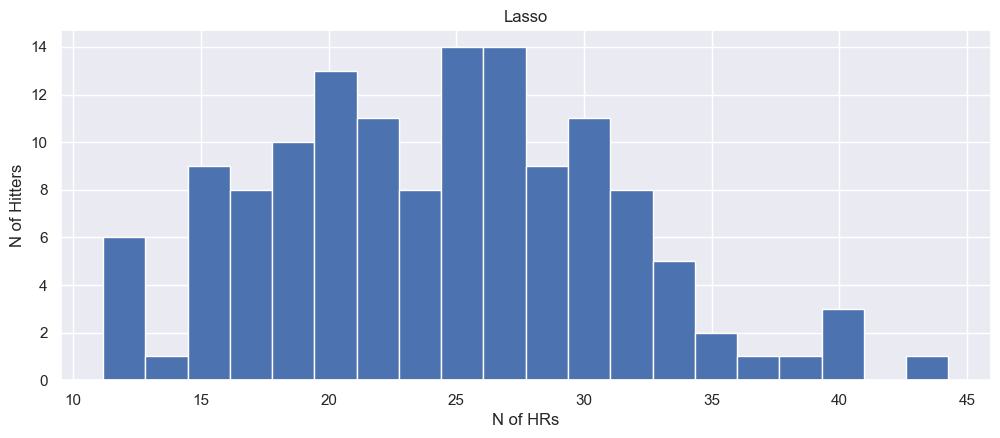

평균 : 24.794444762887867 중앙값 : 24.61361475592705


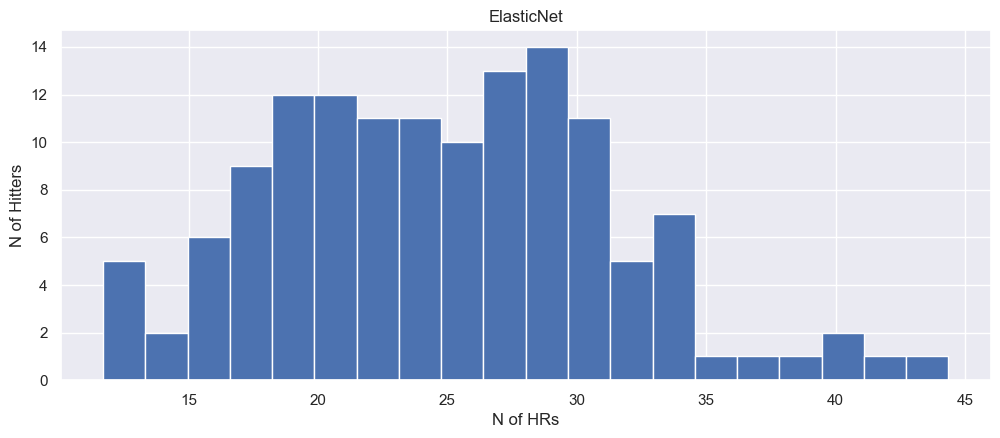

In [53]:
# 홈런의 분포를 확인해보자 -> 히스토그램
plt.subplot(2,1,2)
plt.title("Lasso")
print("평균 :", final_prediction["HR"].mean(), "중앙값 :", final_prediction["HR"].median())
plt.hist(final_prediction["HR"], bins = 20)
plt.xlabel("N of HRs")
plt.ylabel("N of Hitters")
plt.show()
# 홈런의 분포를 확인해보자 -> 히스토그램
plt.subplot(2,1,2)
plt.title("ElasticNet")
print("평균 :", final_prediction_ela["HR"].mean(), "중앙값 :", final_prediction_ela["HR"].median())
plt.hist(final_prediction_ela["HR"], bins = 20)
plt.xlabel("N of HRs")
plt.ylabel("N of Hitters")
plt.show()

In [54]:
# 그래도 점수가 더 높았던 Lasso로 최종 선정(탕탕탕)
final_prediction["HR"] = final_prediction["HR"].round(0).astype("int")
final_prediction = final_prediction.sort_values(by="HR", ascending = False)
final_20_hr_king = final_prediction.iloc[:20,:]
final_20_hr_king.index = range(1, 21)
final_20_hr_king

,PLAYER,HR
1,PeteAlonso,44
2,ShoheiOhtani,41
3,KyleSchwarber,40
4,JorgeSoler,40
5,MattOlson,39
6,SpencerTorkelson,36
7,AdolisGarcía,35
8,VladimirGuerrero,35
9,JakeBurger,34
10,CalRaleigh,34


In [55]:
!pip install openpyxl
!pip install streamlit

In [56]:
import openpyxl
# 소중하게 엑셀로 저장해보자 => 전 csv가 싫어요
final_20_hr_king.to_excel(".\\final_20_hr_kings.xlsx")

In [57]:
import streamlit as st
def main():
    st.title("Best HR Hitter 2024")

    # prediction
    if st.button("Predict"):
        st.write("test")
if __name__ == '__main__':
    main()


2024-04-13 16:04:05.324 
  command:

    streamlit run C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
